In [228]:
# TODO: Boxplot for each item in df.describe()
# TODO: Correlation between sentiment and comment score/average post score
# TODO: Distribution of pos and neg overlapping
# TODO: Wordlength, num different words
# TODO: Show relationship between Parents (posts) and children (comments) => does the sentiment of parent match average of comments?
# TODO: Compare Word Count of posts and number of comments => do longer posts increase number of comments?
# TODO: Show most active authors
# TODO: Find Authors with most negative comments

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_palette = {
    'Positive': '#00B050', # Green
    'Negative': '#FF0000', # Red
    'Neutral': '#7F7F7F'   # Gray
}

sns.set_theme(style="ticks", palette="pastel")

df = pd.read_csv('../data/Audi_bmw_100posts_cleaned.csv')
df.head()

,type,post_title,author,body,score,created_utc,parent_id,id,neg,neu,pos,compound,sentiment_type
0,post,First Time Audi Owner,Colgray21,Traded up from a BMW 535i to this 2024 Q5 and ...,15,2026-01-05 10:31:18,NaN,1q4ia7n,0.000,1.000,0.000,0.0000,Neutral
1,comment,First Time Audi Owner,ecom_ryan,Welcome to the club!,1,2026-01-05 15:16:56,t3_1q4ia7n,nxtjblw,0.000,0.477,0.523,0.5093,Positive
2,post,Talk me out of it: 2016 A5 Sportback 3.0T (B8....,ThatOtherOmar,Im considering trading my 2007 BMW E92 328i fo...,18,2026-01-04 17:55:10,NaN,1q3wjtk,0.042,0.894,0.065,0.6440,Positive
3,comment,Talk me out of it: 2016 A5 Sportback 3.0T (B8....,Beemeristic,"Easy, if you don't have maintenance/repair mon...",9,2026-01-04 18:59:19,t3_1q3wjtk,nxnvmrx,0.000,0.803,0.197,0.4926,Positive
4,comment,Talk me out of it: 2016 A5 Sportback 3.0T (B8....,PurpleSlightlyRed,Previous owner spent more money on the fake RS...,1,2026-01-05 07:20:05,t1_nxnvmrx,nxrvusx,0.223,0.777,0.000,-0.8360,Negative


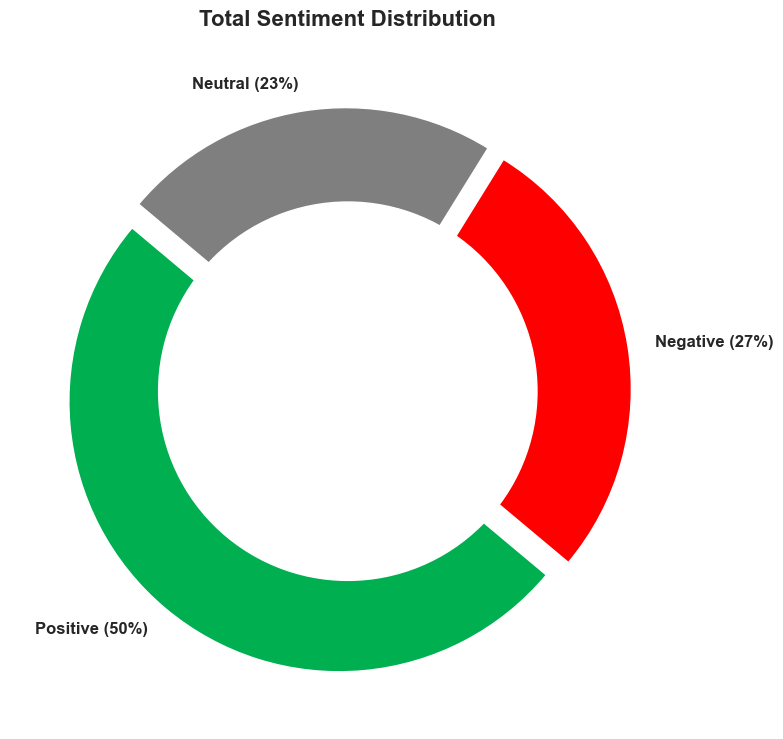

In [187]:
counts = df['sentiment_type'].value_counts()
total = counts.sum()
labels = [f'{label} ({(value/total)*100:.0f}%)' for label, value in counts.items()]

plot_colors = [sentiment_palette[label] for label in counts.index]

plt.figure(figsize=(8, 8))

plt.pie(
    counts,
    labels=labels,
    colors=plot_colors,
    startangle=140,
    pctdistance=0.85,
    explode=[0.05] * len(counts), # small gap in-between slices
    textprops={'fontsize': 12,
               'fontweight': 'bold'}
)

plt.title("Total Sentiment Distribution", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

# Donut chart yay
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

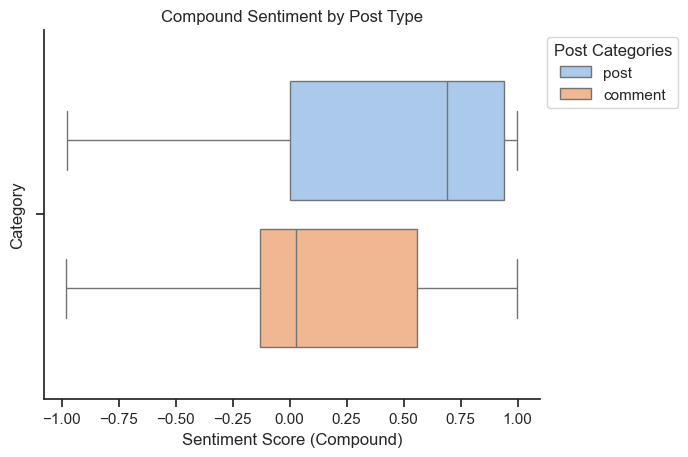

In [188]:
ax = sns.boxplot(
    data=df,
    x='compound',
    hue='type',
    gap=0.2
)

sns.move_legend(
    ax,
    "upper left",
    bbox_to_anchor=(1, 1), title='Post Categories')

ax.set(
    title="Compound Sentiment by Post Type",
    xlabel="Sentiment Score (Compound)",
    ylabel="Category")

sns.despine() # Remove borders

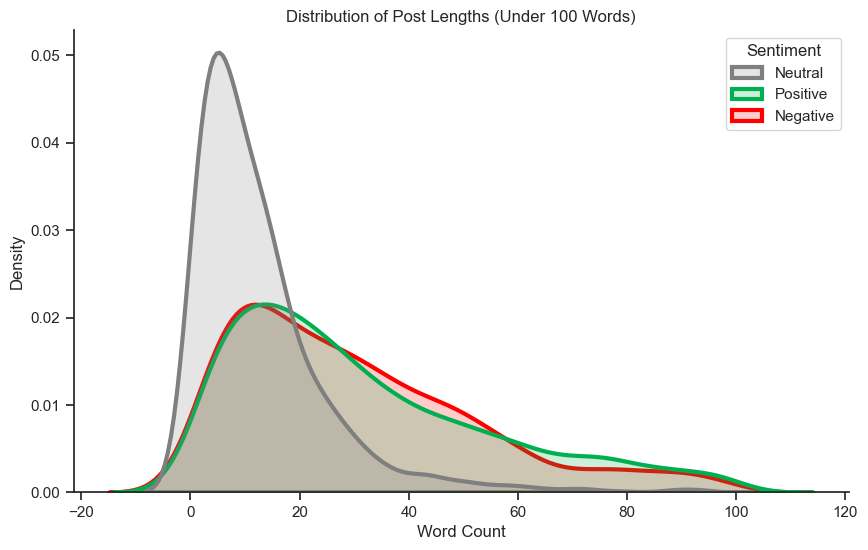

In [219]:
df['word_count'] = df['body'].str.count(' ') + 1
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(
    data=df[df['word_count'] < 100],
    x='word_count',
    hue='sentiment_type',
    fill=True,
    alpha=0.2,
    linewidth=3,          # Make the main lines bolder
    common_norm=False,
    palette=sentiment_palette
)

ax.set(
    title="Distribution of Post Lengths (Under 100 Words)",
    xlabel="Word Count",
    ylabel="Density")

sns.move_legend(ax, "upper right", title='Sentiment')

sns.despine() # Remove borders

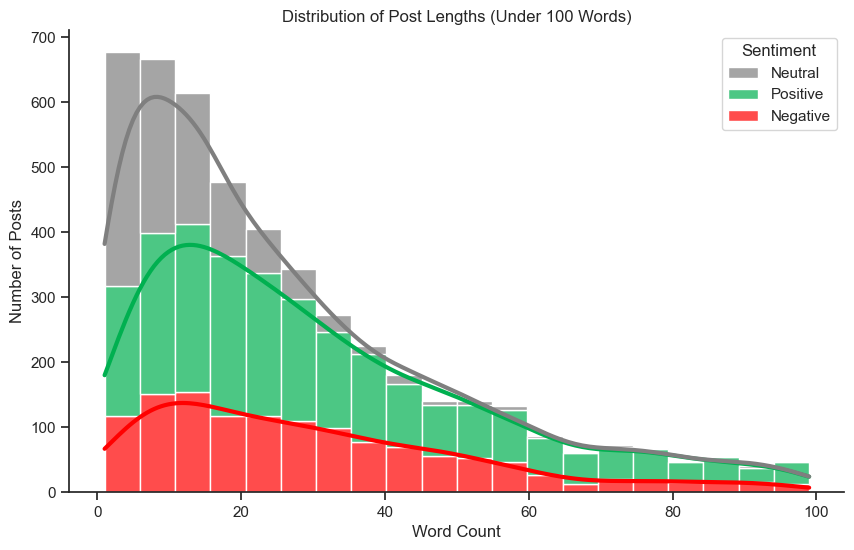

In [220]:
df['word_count'] = df['body'].str.count(' ') + 1
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df[df['word_count'] < 100],
    x='word_count',
    kde=True,
    bins=20,
    hue='sentiment_type',
    multiple='stack', # or doge or fill
    alpha=0.7,
    line_kws={
        'linewidth': 3
    },
    palette=sentiment_palette
)

sns.move_legend(ax, "upper right", title='Sentiment')

ax.set(
    title='Distribution of Post Lengths (Under 100 Words)',
    xlabel='Word Count',
    ylabel='Number of Posts')

sns.despine() # Remove borders

# Time-based analysis

In [214]:
df['created_utc_year'] = df['created_utc'].apply(lambda d: pd.Timestamp(d).year)
df['created_utc_month'] = df['created_utc'].apply(lambda d: pd.Timestamp(d).month)
df['created_utc_weekday'] = df['created_utc'].apply(lambda d: pd.Timestamp(d).dayofweek)

weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

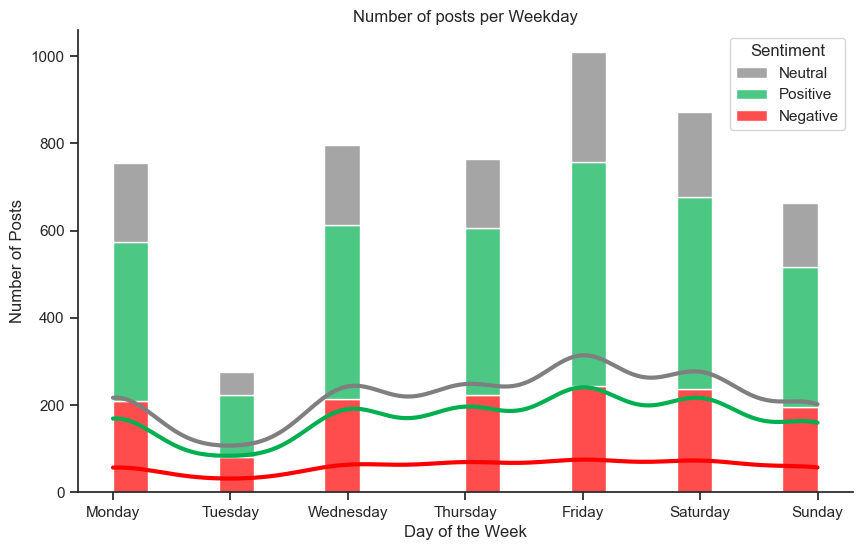

In [227]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df,
    x='created_utc_weekday',
    kde=True,
    bins=20,
    hue='sentiment_type',
    multiple='stack', # or dodge or fill
    alpha=0.7,
    line_kws={
        'linewidth': 3
    },
    palette=sentiment_palette
)

sns.move_legend(ax, "upper right", title='Sentiment')

ax.set(
    title='Number of posts per Weekday',
    xlabel='Day of the Week',
    ylabel='Number of Posts',
    xticks=range(7),
    xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.despine() # Remove borders

# Author Analysis

In [243]:
df_by_authors = df.groupby(by='author').size().reset_index(name='counts')
df_by_authors.sort_values(by='counts',ascending=False).head(10)
## Top User has 162 posts and was deleted maybe a lot of negative posts?

,author,counts
1820,[deleted],162
2522,saintmarko,28
1002,Mean-Marionberry-148,23
1591,SuedeOwl,22
2406,not_old_redditor,21
1662,TheWizard,21
881,KenS7s,20
2037,dokturdeth,20
2670,unfiltered_Rabbit01,19
1179,Ok_Can_7724,18
